In [44]:
# 导入必要包
import torch
import torch.nn as nn
from torchvision.transforms.v2 import ToTensor
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [98]:
# 定义超参数
LR = 1e-2
epochs = 20
BATCH_SIZE = 64

d:\ai_env\conda\envs\ailearn\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


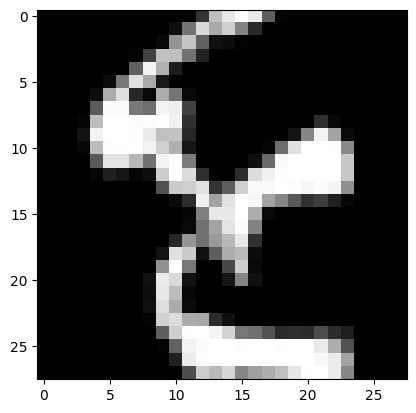

In [93]:
# 数据集加载
train_data = KMNIST(root='./km_data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./km_data', train=False, download=True,
                         transform=ToTensor())
plt.imshow(train_data[30][0].squeeze(), cmap='gray')
plt.draw()

In [94]:
train_dataloader = DataLoader(train_data,BATCH_SIZE,True)
test_dataloader = DataLoader(test_data,BATCH_SIZE)

for X,y in test_dataloader:
    print('shape of X:',X.shape)
    print('shape of y:',y.shape)
    break


shape of X: torch.Size([64, 1, 28, 28])
shape of y: torch.Size([64])


In [95]:
# 定义模型
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),  # 新增的隐藏层
    nn.ReLU(),
    nn.Linear(64, 10)
)

In [99]:
# 损失函数
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.SGD(model.parameters(), lr=LR)


In [100]:
for epoch in range(epochs):
    # 提取训练数据
    for data, target in train_dataloader:
        # 前向运算
        output = model(data.reshape(-1, 784))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        optimizer.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

Epoch:0 Loss: 1.2544102668762207
Epoch:1 Loss: 0.6675434708595276
Epoch:2 Loss: 0.7972394227981567
Epoch:3 Loss: 0.35439953207969666
Epoch:4 Loss: 0.8466308116912842
Epoch:5 Loss: 0.41604581475257874
Epoch:6 Loss: 0.392765074968338
Epoch:7 Loss: 0.4459601640701294
Epoch:8 Loss: 0.3434971868991852
Epoch:9 Loss: 0.3618815839290619
Epoch:10 Loss: 0.20807042717933655
Epoch:11 Loss: 0.345406711101532
Epoch:12 Loss: 0.2941332757472992
Epoch:13 Loss: 0.1918623149394989
Epoch:14 Loss: 0.43923088908195496
Epoch:15 Loss: 0.18948668241500854
Epoch:16 Loss: 0.34960871934890747
Epoch:17 Loss: 0.253868967294693
Epoch:18 Loss: 0.16128341853618622
Epoch:19 Loss: 0.0660320445895195


In [101]:
# 测试数据
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_dataloader:
        output = model(data.reshape(-1, 784))
        _, predicted = torch.max(output, 1)
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item() # item() 返回一个标量
print(f'Accuracy: {correct/total*100}%')


Accuracy: 81.49%
